In [3]:
### Import block

# Coded by Aaron Ghrist January 18, 2026
# Goal: reproduce the Husimi plots for coherent and squeezed states. Then try to get E-field from that?


import matplotlib.pyplot as plt
from numpy import *
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator


from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

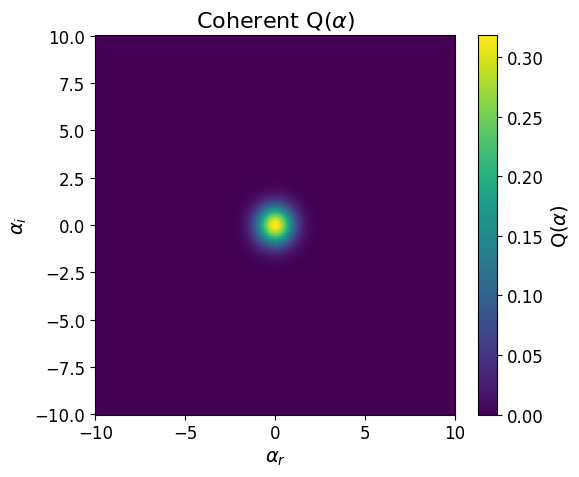

In [4]:
## Coherent pulse

def coherent_Q(alpha_r, alpha_i):
    a_0 = 0.0 + 0.0*1j
    alpha = alpha_r + alpha_i * 1j
    return 1/np.pi * np.exp(-np.abs(alpha-a_0)**2)

# Create a grid of points
n_pts = 500
lim_plt = 10
x = np.linspace(-lim_plt, lim_plt, n_pts)
y = np.linspace(-lim_plt, lim_plt, n_pts)
X, Y = np.meshgrid(x, y)

# Evaluate the function on the grid
Z = coherent_Q(X, Y)

# Plot the 2D color map
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar(c, label=r'Q($\alpha$)')
# plt.clim(0.2, 0.32)
plt.xlabel(r'$\alpha_r$')
plt.ylabel(r'$\alpha_i$')
plt.title(r'Coherent Q($\alpha$)')
plt.tight_layout()
plt.show()




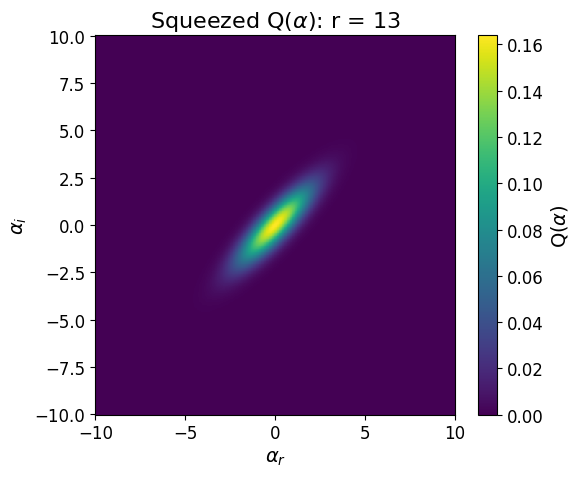

In [5]:
### Squeezed pulse

## Old
# def squeezed_Q(nu_r, nu_i, r):
#     z = nu_r + nu_i * 1j
#     z_star = nu_r - nu_i * 1j
#     return 2/(np.pi * (1+np.cosh(r))) * np.exp(-(1+np.cosh(r))/np.sinh(r) * np.abs(z)**2 - np.cosh(r)/np.sinh(r) * (z**2 + z_star**2))

## New
# def squeezed_Q(nu_r, nu_i, r):
#     # 1/(np.pi * np.cosh(r)) * np.exp(-2*(nu_i)**2/(1+np.exp(2*r)) - 2*(nu_r)**2/(1+np.exp(-2*r)))
#     alpha = 1/np.sqrt(2) * (nu_r + nu_i * 1j)
    
#     return 1/(np.pi * np.cosh(r)) * np.exp(-(np.exp(2*r)*np.real(alpha)**2 + np.exp(-2*r)*np.imag(alpha)**2))

# def squeezed_Q(alpha_r, alpha_i, r):
#     gamma_r = 5
#     gamma_i = 0
#     return 2/np.pi * np.sqrt(r)/(r+1) * np.exp(-(2*r/(r+1))*(alpha_r-gamma_r)**2 - 2/(r+1)*(alpha_i-gamma_i)**2)

def squeezed_Q_rot(alpha_r, alpha_i, r, phi):
    ## Beam center
    gamma_r = 0
    gamma_i = 0
    ## Rotated coordinates
    x_r = (alpha_r-gamma_r)*np.cos(phi) - (alpha_i-gamma_i)*np.sin(phi)
    y_r = (alpha_r-gamma_r)*np.sin(phi) + (alpha_i-gamma_i)*np.cos(phi)
    
    return 2/np.pi * np.sqrt(r)/(r+1) * np.exp(-(2*r/(r+1))*x_r**2 - 2/(r+1)*y_r**2)


# Create a grid of points
n_pts = 500
lim_plt_r = 10
lim_plt_i = 10
x = np.linspace(-lim_plt_r, lim_plt_r, n_pts)
y = np.linspace(-lim_plt_i, lim_plt_i, n_pts)
X, Y = np.meshgrid(x, y)

r = 13
phi = pi/4
## Note that the definition I'm using for r (coming from Schleich) actually has r=1 as the unsqueezed pulse, not r=0

# Evaluate the function on the grid
# Z = np.abs(squeezed_Q(X, Y, r))
Z = np.abs(squeezed_Q_rot(X, Y, r, phi))

## Plot the 2D color map
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar(c, label=r'Q($\alpha$)')
# plt.clim(0.2, 0.32)
plt.xlabel(r'$\alpha_r$')
plt.ylabel(r'$\alpha_i$')
plt.title(r'Squeezed Q($\alpha$): r = ' + str(r))
plt.tight_layout()
plt.show()


# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)

# # Customize the z axis.
# # ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# # Add a color bar which maps values to colors.
# # fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


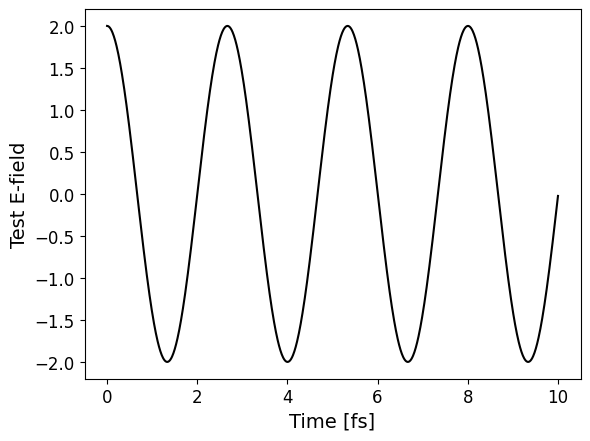

In [6]:
### Now that I actually believe these Q(alpha) functions, I think it's time to try to evaluate the coefficients for the E-field

## We should be able to use the gamma to define a displaced squeezed state (as oppoced to having it be centered at zero, which should be our BSV)

#### Let's try to get the time-evolution correct 

## The thing that's strange to me is that for BSV it's symmetric about the alpha_i axis, meaning that alpha* = alpha and it should be simple time-evolution


# E(t) = 1/2 * [a(t) + a*(t)]
# a = x + ip


a_test = 1

t_array = np.linspace(0, 10, 1000) # In fs

w = 2.355 # In fs^{-1} - this is for 800 nm light

E_coh_array = a_test * (np.exp(-1j*w*t_array) + np.exp(1j*w*t_array)) ## Simple coherent e-field

r = 2

x_test = 5e6
p_test = 2e6

# Normalizes x and p 

xi = pi

E_sq_array = x_test * np.exp(-r) * np.exp(1j*xi) * cos(w*t_array) + p_test * np.exp(r) * sin(w*t_array)





plt.figure()

plt.plot(t_array, E_coh_array, color = 'k', label = 'coherent')
# plt.plot(t_array, E_sq_array, color = 'b', label = 'squeezed')

# plt.plot(t_array, E_coh_array/np.max(E_coh_array), color = 'k', label = 'coherent')
# plt.plot(t_array, E_sq_array/np.max(E_sq_array), color = 'b', label = 'squeezed')


plt.xlabel('Time [fs]')

plt.ylabel('Test E-field')

plt.show()



## Variance plot?

theta_array = w * t_array






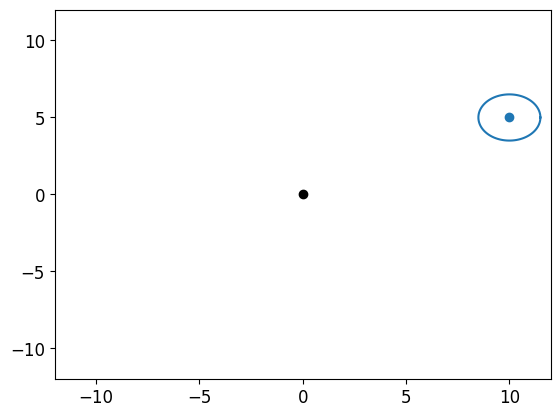

In [7]:
#### We're finally making good progress, but let's try just bypassing all of this 

## Procedure would be (roughly):
## 1) Find the desired operator to evaluate the expectation value
## 2) Antinormal order the operator using the commutation relation
## 3) Find a classical expression for the operator by replacing \hat{a} and \hat{a}^{dagger} with alpha and alpha^*
## 4) Evaluate the expectation value by taking the double integral of the operator times Q(alpha) over the real and imaginary alphas

### The reason I'm uncertain about doing this is that this procedure (calculating E and E^2) then using those for the value and uncertainty
### gives no information about phase uncertainty (which is essential for our fringe calculation)

##### 

## Google offers up: E(t) = E_0 (X1 / 2 cos(wt) + X2 / 2 sin(wt))
# with Delta(X1)^2 = (h-bar/2) exp(-2r)
# and Delta(X2)^2 = (h-bar/2) exp(2r)

E_0 = 1

r = 0 # 13

t_plt = np.linspace(0, 10, 1000)
w= 2

X1 = 10
X2 = 5

n_stds = 3

### Want to plot uncertainties as a confidence ellipse (uncertainties in X1 and X2 are correlated)

scale_x = 1/2 * np.exp(-2*r)
scale_y = 1/2 * np.exp(2*r)

fig, ax = plt.subplots()
plt.scatter(X1, X2)

plt.scatter(0,0, color = 'k')

a = 1/2 * np.exp(-2*r)    #radius on the x-axis
b = 1/2 * np.exp(2*r)    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot(X1+n_stds*a*np.cos(t), X2+n_stds*b*np.sin(t))

ax.set_xlim(-12,12)
ax.set_ylim(-12,12)

plt.show()



E_plt = E_0 *(X1/2*cos(w*t_plt) + X2/2*sin(w*t_plt))




# plt.figure()
# plt.plot(t_plt, E_plt)
# plt.show()




19.977546167549583


<>:104: SyntaxWarning: invalid escape sequence '\p'
<>:104: SyntaxWarning: invalid escape sequence '\p'
/var/folders/38/nh9v69ds38g0qknv680zrsj40000gn/T/ipykernel_56096/3447101651.py:104: SyntaxWarning: invalid escape sequence '\p'
  """


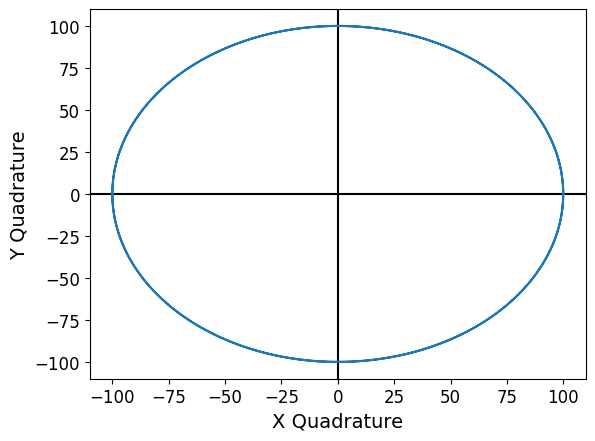

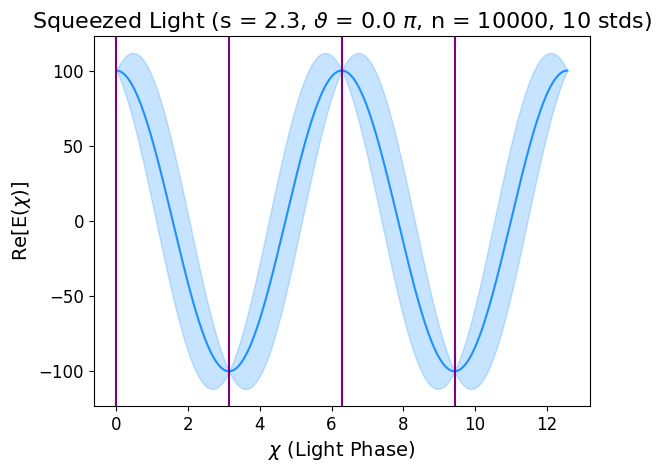

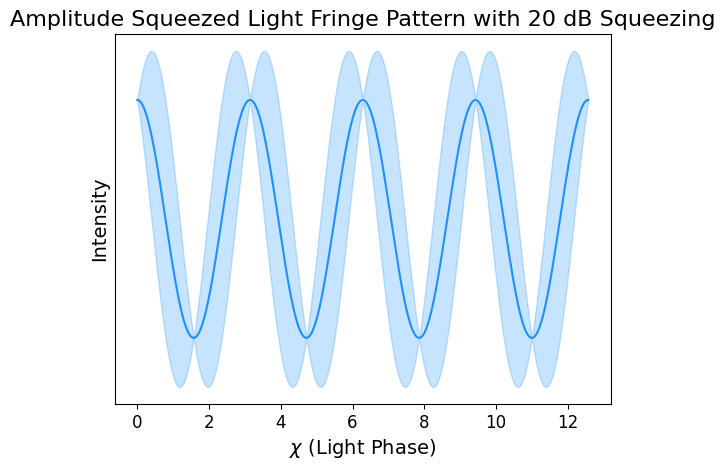

In [8]:
### Attempt starting 1/23/26

### Basing this method on chapter 5 of Loudon using his notation
# chi: overall phase of the (center of the) light
# theta: angle in X-Y quadrature space (For this we'll work in the case that theta = chi so the projection is maximal and SNR is highest)
# theta_script: used to control the 'phase' of the squeezing quadrature. Converts between amplitude and phase squeezing
# X: when theta = chi, real component of electric field (=1/2 (a^+ + a))
# Y: when theta = chi, imaginary component of electric field (=1/2 i(a^+ - a))
# <n>: average number of photons in beam
# alpha: describes the position in complex (X-Y quadrature) space : sqrt(n) * exp(-i*theta)  (?)
###


### Let's first test generating a coherent state distribution in X and Y quadratures
sigma_scale = 10 # Adjusts how many stds are plotted for E-field uncertainty

n = int(1e4) # 1e6
s = 2.3 # Adjusts squeezing amount, 2.3 is 20 dB, 1.15 is 10 dB
dB_squeeze=-10*np.log10(np.exp(-2*s)) #dB
print(dB_squeeze)
theta_script = 0#np.pi #np.pi/2  # Adjusts squeezing angle (0 = amp, pi = phase)

plot_ts = theta_script/np.pi


chi_array = np.linspace(0, 4*np.pi, 1000)

x_center_array = np.sqrt(n)*np.cos(chi_array)
y_center_array = np.sqrt(n)*np.sin(chi_array)


## Amplitude is |alpha| = sqrt(<n>)
plt.figure()

plt.axvline(0, color = 'k')
plt.axhline(0, color = 'k')

plt.plot(x_center_array, y_center_array)

plt.xlabel('X Quadrature')
plt.ylabel('Y Quadrature')

plt.show()


##### 

## Actually we don't want to make theta = chi since then we would never have the magnitude of the real part of E-field decrease
## Let's just pick theta = 0 (semi-arbitrarily). Then:

# S = |alpha| cos(chi)  [5.6.11]
# N = 1/4 (e^(2s) sin^2(chi - 0.5*theta_script) + e^(-2s) cos^2(chi - 0.5*theta_script) )

S_array = np.sqrt(n) * np.cos(chi_array)

N_array = 0.25 * (np.exp(2*s) * np.sin(chi_array - 0.5*theta_script)**2 + np.exp(-2*s) * np.cos(chi_array - 0.5*theta_script)**2)


## In the one scheme, we want to move the quadrature angle such that we achieve optimal squeezing at measurement phase (or position) chi:
## this occurs at the minimum of :
# d sqrt(N_array)/d chi = 0
# --> theta_script = 2*chi gives the minimum E-field noise at fringe phase chi




plt.figure()

plt.plot(chi_array, S_array, color = 'dodgerblue')
plt.fill_between(chi_array, S_array-np.multiply(sigma_scale,np.sqrt(N_array)), S_array+np.multiply(sigma_scale,np.sqrt(N_array)), color='dodgerblue', alpha=0.25)

plt.xlabel(r'$\chi$ (Light Phase)')
plt.ylabel(r'Re[E($\chi$)]')

if s == 0:
    plt.title(r'Coherent Light (n = ' + str(n) + ', ' + str(int(sigma_scale)) + ' stds)')
else:
    plt.title(r'Squeezed Light (s = ' + str(s) + r', $\vartheta$ = ' + str(plot_ts) + r' $\pi$, n = ' + str(n) + ', ' + str(int(sigma_scale)) + ' stds)')
    plt.axvline(1/2*theta_script, color = 'purple')
    plt.axvline(1/2*theta_script + np.pi, color = 'purple')
    plt.axvline(1/2*theta_script + 2*np.pi, color = 'purple')
    plt.axvline(1/2*theta_script + 3*np.pi, color = 'purple')

plt.show()



### Let's now calculate the intensity of the e-field (|E|^2) with its uncertainty

plt.figure()

plt.plot(chi_array, S_array**2, color = 'dodgerblue')
## dI/|I| = 2 dE/|E|  ==> sigma(S^2) = 2 |S| sqrt(N)

sigma_I = 2.0 * np.abs(S_array) * np.sqrt(N_array)

plt.fill_between(chi_array, S_array**2-np.multiply(sigma_scale, sigma_I), S_array**2+np.multiply(sigma_scale, sigma_I), color='dodgerblue', alpha=0.25)
plt.xlabel(r'$\chi$ (Light Phase)')
#plt.ylabel(r'I($\chi$)')
plt.ylabel('Intensity')
plt.yticks([])
plt.title(f'Amplitude Squeezed Light Fringe Pattern with {int(round(dB_squeeze))} dB Squeezing')

"""
if s == 0:
    plt.title(r'Coherent Light (n = ' + str(n) + ', ' + str(int(sigma_scale)) + ' stds)')
else:
    plt.title(r'Squeezed Light (s = ' + str(s) + r', $\vartheta$ = ' + str(plot_ts) + r' $\pi$, n = ' + str(n) + ', ' + str(int(sigma_scale)) + ' stds)')
    plt.axvline(1/2*theta_script, color = 'purple')
    plt.axvline(1/2*theta_script + np.pi, color = 'purple')
    plt.axvline(1/2*theta_script + 2*np.pi, color = 'purple')
    plt.axvline(1/2*theta_script + 3*np.pi, color = 'purple')
"""
plt.show()




In [9]:
### Makes a 2D gaussian at one of the chi points, then visualizes that
# n_pts = 1000
# lim_plt = 5


# x_array = np.linspace(-lim_plt, lim_plt, n_pts)
# y_array = np.linspace(-lim_plt, lim_plt, n_pts)
# X, Y = np.meshgrid(x_array, y_array)

# # Mean vector and covariance matrix
# mu = np.array([0., 0.])
# Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# # Pack X and Y into a single 3-dimensional array
# pos = np.empty(X.shape + (2,))
# pos[:, :, 0] = X
# pos[:, :, 1] = Y

## I'm not sure this will have the right fall-off behavior (<E^2> = sqrt(<n>))
# def coherent_Q_variable(alpha_r, alpha_i, alpha_0_r, alpha_0_i):
#     a_0 = alpha_0_r + alpha_0_i*1j
#     alpha = alpha_r + alpha_i * 1j
#     return 1/np.pi * np.exp(-np.abs(alpha-a_0)**2)



# dist_array = np.zeros((len(x_array), len(y_array), len(chi_array)))
# # for x_ctr, y_ctr, ii in zip(x_center_array, y_center_array, range(len(x_center_array))):
# #     dist_array[:,:,ii] = coherent_Q_variable(X, Y, x_ctr, y_ctr)

# test = coherent_Q_variable(X, Y, 1.0, 0.0)
# # test = coherent_Q(X, Y)


# plt.figure(figsize=(6, 5))
# # c = plt.pcolormesh(X, Y, dist_array[:,:,0], shading='auto', cmap='viridis')
# c = plt.pcolormesh(X, Y, test, shading='auto', cmap='viridis')
# plt.colorbar(c, label=r'Q($\alpha$)')
# # plt.clim(0.2, 0.32)
# plt.xlabel(r'$\alpha_r$')
# plt.ylabel(r'$\alpha_i$')
# # plt.title(r'Squeezed Q($\alpha$): r = ' + str(r))
# plt.tight_layout()
# plt.show()


Text(0, 0.5, 'Number of Compton Photons [a.u]')

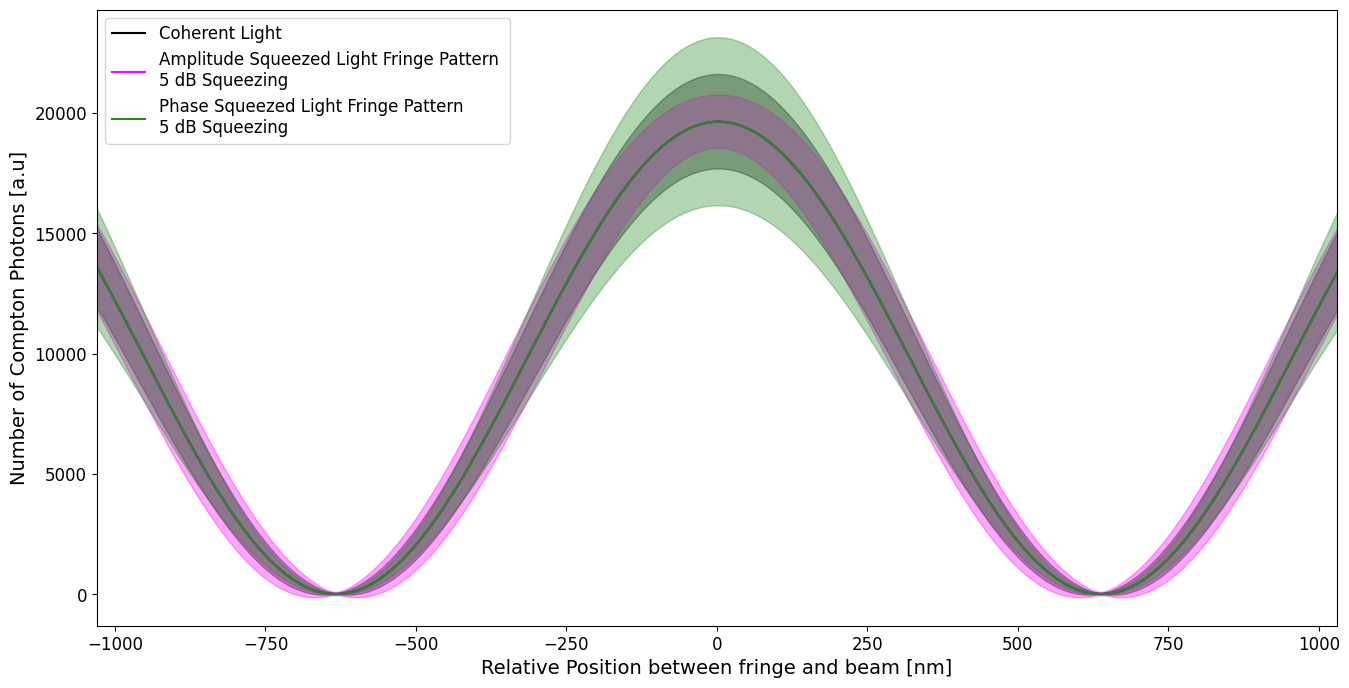

In [119]:
pi=np.pi
chi_array = np.linspace(0, 4*np.pi, 1000)

def make_fringe(squeezephase,db):
    n = int(1e4) # 1e6
    s = db # Adjusts squeezing amount
    dB_squeeze=-10*np.log10(np.exp(-2*s)) #dB
    #print(dB_squeeze)
    theta_script = squeezephase #np.pi #np.pi/2  # Adjusts squeezing angle (0 = amp, pi = phase)
    S_array = np.sqrt(n) * np.cos(chi_array)
    N_array = 0.25 * (np.exp(2*s) * np.sin(chi_array - 0.5*theta_script)**2 + np.exp(-2*s) * np.cos(chi_array - 0.5*theta_script)**2)
    return S_array, N_array

db = 2.3/2/2 # Adjusts squeezing amount
dB_squeeze=-10*np.log10(np.exp(-2*db)) #dB
phase_sq_fringe,N_phase=make_fringe(pi,db)
amp_sq_fringe, N_amp=make_fringe(0,db)
coherent, N_coherent=make_fringe(0,0)

#plt.fill_between(chi_array, S_array**2-np.multiply(sigma_scale,N_array), S_array**2+np.multiply(sigma_scale,N_array), color='dodgerblue', alpha=0.25)

#start of beam code
def gaussian_beam(x, N, dx,u):
    return N  * np.exp(-0.5 * ((x-u)/dx)**2) *1/ (np.sqrt(2*np.pi)*dx)
sigma_b=10 #nm 
N=10 #6.4*10**8 #100 pC of charge
lambdaL=1030 #nm wavelength
photonscaling=1 
x= np.linspace(-(np.max(chi_array)-np.min(chi_array))/2, (np.max(chi_array)-np.min(chi_array))/2,len(chi_array))*lambdaL/2*pi/4 #match range and length of chi array but put into nm
beam=gaussian_beam(x,N,sigma_b,0)
sigma_scale = 10 # Adjusts how many stds are plotted for E-field uncertainty



## dI/|I| = 2 dE/|E|  ==> sigma(S^2) = 2 |S| sqrt(N)
#sigma_I = 2.0 * np.abs(S_array) * np.sqrt(N_array)
#plt.fill_between(chi_array, S_array**2-np.multiply(sigma_scale, sigma_I), S_array**2+np.multiply(sigma_scale, sigma_I), color='dodgerblue', alpha=0.25)

plt.figure(figsize=(16, 8)) 
def plot_convolution(S,n,color):
    fringe=S**2*photonscaling
    convolution=np.convolve(beam, fringe, mode="same")
    sigma_I = 2.0 * np.abs(S) * np.sqrt(n)
    fringe_max=(S_array**2-np.multiply(sigma_scale, sigma_I))*photonscaling
    fringe_min=(S_array**2+np.multiply(sigma_scale, sigma_I))*photonscaling
    convolution_max=np.convolve(beam, fringe_max, mode="same")
    convolution_min=np.convolve(beam, fringe_min, mode="same")
    plt.fill_between(x, convolution_min, convolution_max, color=color, alpha=0.35)
    return convolution

color1='black'
coherent=plot_convolution(coherent,N_coherent,color1)
plt.plot(x,coherent,color=color1,label='Coherent Light')

color2='magenta'
amp_sq=plot_convolution(amp_sq_fringe,N_amp,color2)
plt.plot(x,amp_sq,color=color2,label=f'Amplitude Squeezed Light Fringe Pattern \n{int(round(dB_squeeze))} dB Squeezing')

color3='forestgreen'
phase_sq=plot_convolution(phase_sq_fringe,N_phase,color3)
plt.plot(x,phase_sq,color=color3,label=f'Phase Squeezed Light Fringe Pattern \n{int(round(dB_squeeze))} dB Squeezing')

plt.legend(loc='upper left')
plt.xlim([-lambdaL,lambdaL])
#plt.ylim([150000,175000])
plt.xlabel('Relative Position between fringe and beam [nm]')
plt.ylabel('Number of Compton Photons [a.u]')

Text(0.5, 1.0, 'Beam Measurement for a 10 nm Electron Beam and 1030 nm Fringe Pattern')

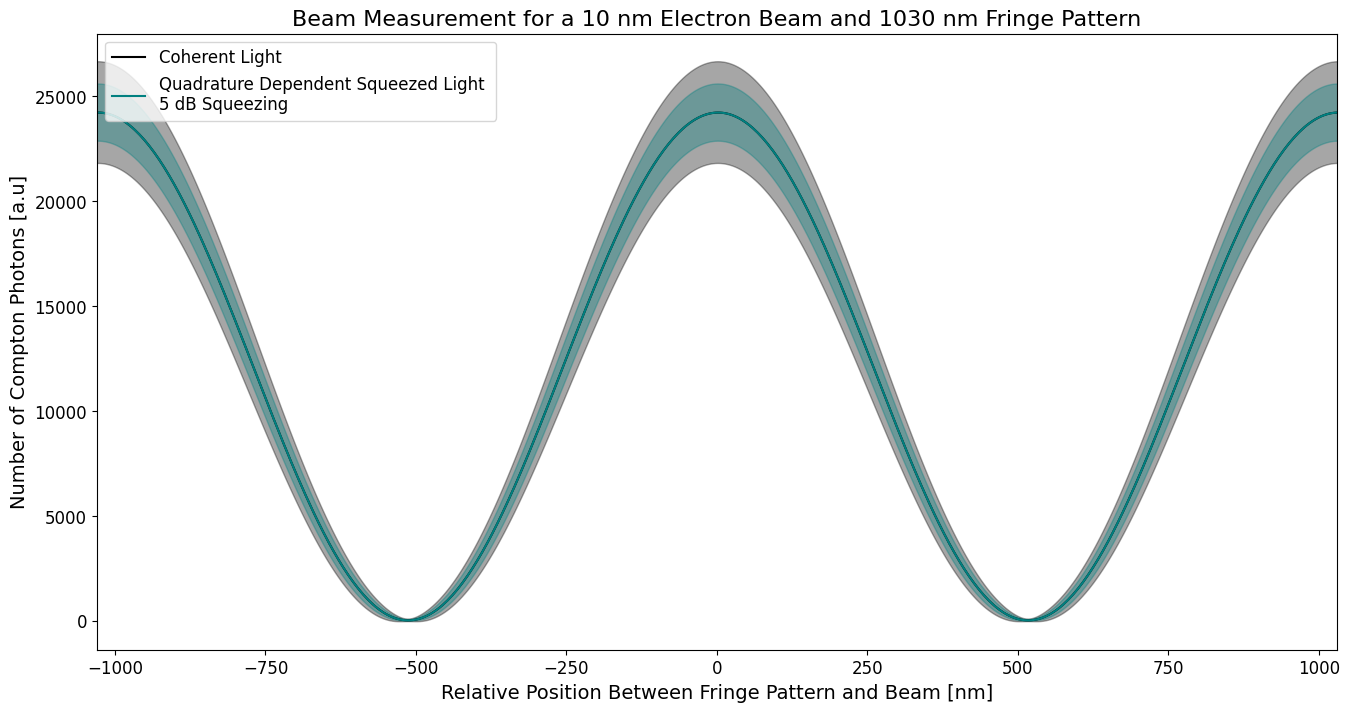

In [ ]:
chi_array = np.linspace(-2*pi, 2*np.pi, 1000)
theta_script_array = chi_array * 2.0

def make_dep_fringe(squeezephase,db):
    n = int(1e4) # 1e6
    s = db # Adjusts squeezing amount
    dB_squeeze=-10*np.log10(np.exp(-2*s)) #dB
    #print(dB_squeeze)
    theta_script = squeezephase #np.pi #np.pi/2  # Adjusts squeezing angle (0 = amp, pi = phase)
    S_array = np.sqrt(n) * np.cos(chi_array)
    N_array = 0.25 * (np.exp(2*s) * np.sin(chi_array - 0.5*theta_script_array)**2 + np.exp(-2*s) * np.cos(chi_array - 0.5*theta_script_array)**2)
    return S_array, N_array


 
db = 2.3/2/2 # Adjusts squeezing amount
dB_squeeze=-10*np.log10(np.exp(-2*db)) #dB
sq_fringe, N_sq=make_dep_fringe(0,db)
coherent, N_coherent=make_fringe(0,0)

#plt.fill_between(chi_array, S_array**2-np.multiply(sigma_scale,N_array), S_array**2+np.multiply(sigma_scale,N_array), color='dodgerblue', alpha=0.25)

#start of beam code
def gaussian_beam(x, N, dx,u):
    return N  * np.exp(-0.5 * ((x-u)/dx)**2) *1/ (np.sqrt(2*np.pi)*dx)
sigma_b=10 #nm 
N=10 #6.4*10**8 #100 pC of charge
lambdaL=1030 #nm wavelength
photonscaling=1 
x= np.linspace(-lambdaL*2,lambdaL*2, len(chi_array))#np.linspace(-(np.max(chi_array)-np.min(chi_array))/2, (np.max(chi_array)-np.min(chi_array))/2,len(chi_array))*lambdaL/2*pi/4 #match range and length of chi array but put into nm
beam=gaussian_beam(x,N,sigma_b,0)
sigma_scale = 10 # Adjusts how many stds are plotted for E-field uncertainty



## dI/|I| = 2 dE/|E|  ==> sigma(S^2) = 2 |S| sqrt(N)
#sigma_I = 2.0 * np.abs(S_array) * np.sqrt(N_array)
#plt.fill_between(chi_array, S_array**2-np.multiply(sigma_scale, sigma_I), S_array**2+np.multiply(sigma_scale, sigma_I), color='dodgerblue', alpha=0.25)

plt.figure(figsize=(16, 8)) 
def plot_convolution(S,n,color):
    fringe=S**2*photonscaling
    convolution=np.convolve(beam, fringe, mode="same")
    sigma_I = 2.0 * np.abs(S) * np.sqrt(n)
    fringe_max=(S_array**2-np.multiply(sigma_scale, sigma_I))*photonscaling
    fringe_min=(S_array**2+np.multiply(sigma_scale, sigma_I))*photonscaling
    convolution_max=np.convolve(beam, fringe_max, mode="same")
    convolution_min=np.convolve(beam, fringe_min, mode="same")
    plt.fill_between(x, convolution_min, convolution_max, color=color, alpha=0.35)
    return convolution

color1='black'
coherent=plot_convolution(coherent,N_coherent,color1)
plt.plot(x,coherent,color=color1,label='Coherent Light')

color2='teal'
sq=plot_convolution(sq_fringe,N_sq,color2)
plt.plot(x,sq,color=color2,label=f'Quadrature Dependent Squeezed Light \n{int(round(dB_squeeze))} dB Squeezing')


plt.legend(loc='upper left')
plt.xlim([-lambdaL,lambdaL])
#plt.ylim([150000,175000])
plt.xlabel('Relative Position Between Fringe Pattern and Beam [nm]')
plt.ylabel('Number of Compton Photons [a.u]')
plt.title(f'Beam Measurement for a {sigma_b} nm Electron Beam and {lambdaL} nm Fringe Pattern')